# Ex 15.8 — Classification with the Iris Dataset (KNN Hyperparameter Tuning)

This notebook:
- Loads the Iris dataset from `sklearn.datasets`
- Uses **10-fold cross-validation** via `cross_val_score(..., cv=10)` for K from 1 to 31
- Plots **Value of K for KNN** vs **Cross-Validated Accuracy** (and a 2nd plot of error)
- Uses **GridSearchCV** to confirm the best K

> Note: Results can vary slightly depending on scikit-learn version / randomness settings. This assignment explicitly uses `cv=10` (not a custom `KFold`).

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# 1) Load Iris data
iris = load_iris()
X = iris.data
y = iris.target

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Classes:", iris.target_names)


X shape: (150, 4)
y shape: (150,)
Classes: ['setosa' 'versicolor' 'virginica']


In [3]:
# 2) Hyperparameter tuning with cv=10 (no custom KFold)
k_range = range(1, 32)  # 1..31 inclusive

cv_means = []
cv_stds = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)  # 10-fold CV
    cv_means.append(scores.mean())
    cv_stds.append(scores.std())

cv_means = np.array(cv_means)
cv_stds = np.array(cv_stds)

best_k = int(k_range[int(np.argmax(cv_means))])
best_acc = float(np.max(cv_means))

print(f"Best k from loop: {best_k}")
print(f"Best CV accuracy: {best_acc:.4f}")


Best k from loop: 13
Best CV accuracy: 0.9800


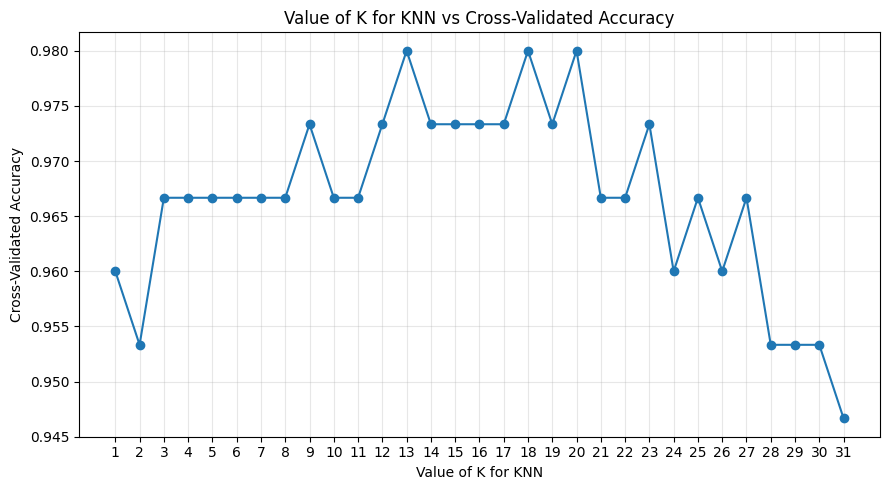

In [4]:
# 3) Plot 1: Value of K for KNN vs Cross-Validated Accuracy
plt.figure(figsize=(9, 5))
plt.plot(list(k_range), cv_means, marker='o')
plt.title("Value of K for KNN vs Cross-Validated Accuracy")
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.xticks(list(k_range))
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save as requested (matches the naming in the prompt)
plt.savefig("knn-1.jpg", dpi=200)
plt.show()


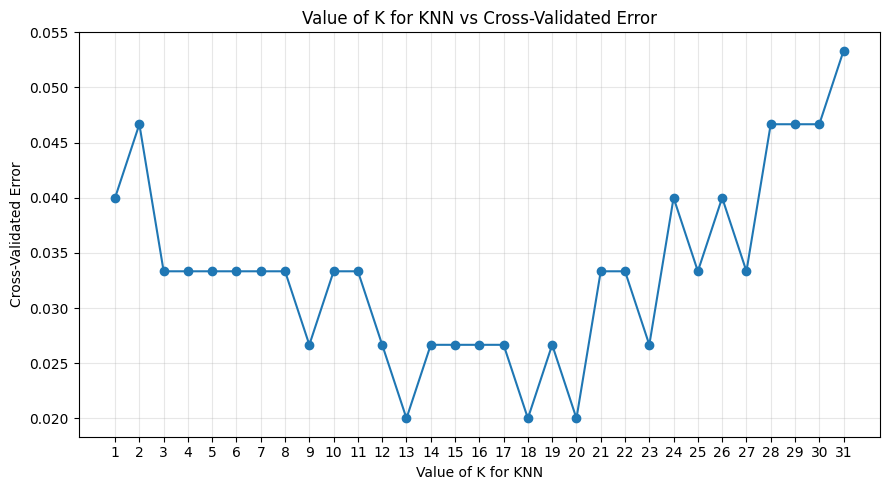

In [5]:
# Plot 2: Misclassification error (1 - accuracy) vs K
error = 1 - cv_means

plt.figure(figsize=(9, 5))
plt.plot(list(k_range), error, marker='o')
plt.title("Value of K for KNN vs Cross-Validated Error")
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Error")
plt.xticks(list(k_range))
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save as requested (matches the naming in the prompt)
plt.savefig("knn2-1.jpg", dpi=200)
plt.show()


In [6]:
# 4) GridSearchCV to confirm the optimal k
param_grid = {"n_neighbors": list(range(1, 32))}

grid = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=10,
    scoring="accuracy"
)

grid.fit(X, y)

print("GridSearch best params:", grid.best_params_)
print(f"GridSearch best CV accuracy: {grid.best_score_:.4f}")


GridSearch best params: {'n_neighbors': 13}
GridSearch best CV accuracy: 0.9800
